In [1]:
%matplotlib inline

In [2]:
import scrapy
from scrapy.crawler import CrawlerProcess
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import numpy as np
import json
import pytz
import seaborn as sns

# Jobs.bg job analysis
## Project Overview

### The goal of this analysis is to show any correlation between different fields in a job posting, so we can make a decision which is the most widely used job currently and most useded programming and non-programming skills

In [3]:
!scrapy crawl scraper_name.py

Scrapy 2.6.1 - no active project

Unknown command: crawl

Use "scrapy" to see available commands


### Navigate to folder

In [4]:
cd '/Users/dilyanyordanov/Documents/Softuni_AI/TEST/project/jobscraper/'

/Users/dilyanyordanov/Documents/Softuni_AI/TEST/project/jobscraper


### Data

### Dataset Description
#### The dataset used in this analysis was obtained by scraping www.jobs.bg It contains information about job postings such as: job website, position name, date of postage, , company name, number of non IT employees as well as number of IT employees, location, date of establishment, work from home option as well as different programming and non-programming skill set.

In [5]:
!scrapy crawl scraper_name > output_file.log 2>&1

In [6]:
# Reading the json data
df = pd.read_json("items.json")

### Some key features in the dataset include:
- 'position': Title of the job position
- 'company_name': Name of the employeer
- 'location': Location of the company
- 'number_of_employees': Total number of employees
- 'established': Year of establishment
- 'todays_date': Today's date
- 'date_posted': Date when the job posting was created
- 'job_url': A link to the job posting
- 'work_from_home': Work from home option (Home OFfice Possible, Online Interview)
- 'skills_list': A list of the programming tech stack required for the position
- 'skills_no_img': A list of the non programming tech stack required for the position

In [7]:
df.head(5)

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,salary
0,[Head of SEO (SEO Director)],Фючърмедиа ЕООД,,"[\n , \n 30 служители; ...",2016.0,15.03.23,днес,https://www.jobs.bg/job/6746997,"[Home Office Possible, Online Interview]",[Английски],[SEO],<b>24 дни</b>
1,"[Wellness Support Specialist with Dutch, Finis...",Астреа Рикрутмънт ЕООД,София Заплата,"[\n , \n В България от 20...",2007.0,15.03.23,днес,https://www.jobs.bg/job/6758809,[],"[Английски, Нидерландски, Норвежки, Немски, Фи...",,<b>от 3400 до 4000 BGN</b>
2,[Backend Developer],HedgeServ (Bulgaria) EOOD,София,"[\n , \n 150 служители; ...",2012.0,15.03.23,днес,https://www.jobs.bg/job/6758805,"[Home Office Possible, Online Interview]","[Python, SQL, Jira, Jenkins]",,None
3,[Junior Backend Developer],HedgeServ (Bulgaria) EOOD,София,"[\n , \n 150 служители; ...",2012.0,15.03.23,днес,https://www.jobs.bg/job/6758795,"[Home Office Possible, Online Interview]",[Python],,None
4,[Data Operations Specialist with German],SOITRON LTD,,"[\n , \n 220 служители; ...",2013.0,15.03.23,днес,https://www.jobs.bg/job/6758592,"[Home Office Possible, Online Interview]","[Английски, Немски]",,None


## Data Cleaning

In [8]:
# Let's check how many columns and rows do we have
df.shape

(3449, 12)

In [9]:
# Let's fill the None values with 0 and remove the <b> tags
df['salary'] = df['salary'].fillna(0)
df['salary'].unique()
df['salary'] = df['salary'].apply(lambda x: re.sub('<[^>]*>', '', x) if isinstance(x, str) else x)


In [10]:
# Checking if there is a "BGN" in the result and extracts only those results
def filter_salary(x):
    if isinstance(x, str) and 'BGN' in x:
        return x
    else:
        return None

df['salary'] = df['salary'].apply(filter_salary)


In [11]:
def extract_mean_salary(salary_string):
    if salary_string:
        # Remove unwanted strings and split by whitespace
        numbers = salary_string.replace("от", "").replace("до", "").replace("BGN", "").split()

        # Convert the split strings to integers
        int_numbers = [int(num) for num in numbers]

        # Calculate the mean
        mean_salary = sum(int_numbers) / len(int_numbers)

        return mean_salary
    else:
        return None

df['mean_salary'] = df['salary'].apply(extract_mean_salary)
df['mean_salary'] = df['mean_salary'].fillna(0)
df['mean_salary'].unique()

array([    0.,  3700.,  5050.,  3250.,  2250.,  4750.,  7200.,  8000.,
        4500.,  5000.,  2150.,  1550.,  1500.,  1750.,  3000.,  2850.,
        7000.,  2050.,  2650.,  6250.,  2500.,  6500.,  6000.,  3125.,
        4000.,  4250.,  1450.,  1700.,  8250.,  7500.,  2100.,  2750.,
        7900.,  7750.,  3500.,  9250.,  5250.,  2800.,  2550., 11500.,
       10750.,  8500.,  1250.,  7650.,  1800., 10600.,  7600.,  5750.,
        1950.,   600.,  4400.,  2000.,  8400.,  3650., 11000., 12500.,
        5500.,   750.,  1100.,  4450.,  1000.,  1600.,  6750., 11100.,
        2400.,  1200.,  9000.,  9350.,  7150.,  8950.,  8350.,  8800.,
        9850.,  3350.,  7700.,  9500.,  5350.,  1350., 10000.,  2300.,
        4800.,  8750.,  3750.,  1900.,  9100.,  3805.,  4700.,  3450.,
        1400.,  4200.,  7250.,  3050.,  1650.,  3300.,  2900.,  1380.,
        1290.,  1420., 22000.,  1280.,  5150.,  2200.,  5450.,  3200.,
        3100.,  1300.,  2600.,  3400.,  2575.,  2950.])

In [12]:
df.head()

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,salary,mean_salary
0,[Head of SEO (SEO Director)],Фючърмедиа ЕООД,,"[\n , \n 30 служители; ...",2016.0,15.03.23,днес,https://www.jobs.bg/job/6746997,"[Home Office Possible, Online Interview]",[Английски],[SEO],None,0.0
1,"[Wellness Support Specialist with Dutch, Finis...",Астреа Рикрутмънт ЕООД,София Заплата,"[\n , \n В България от 20...",2007.0,15.03.23,днес,https://www.jobs.bg/job/6758809,[],"[Английски, Нидерландски, Норвежки, Немски, Фи...",,от 3400 до 4000 BGN,3700.0
2,[Backend Developer],HedgeServ (Bulgaria) EOOD,София,"[\n , \n 150 служители; ...",2012.0,15.03.23,днес,https://www.jobs.bg/job/6758805,"[Home Office Possible, Online Interview]","[Python, SQL, Jira, Jenkins]",,None,0.0
3,[Junior Backend Developer],HedgeServ (Bulgaria) EOOD,София,"[\n , \n 150 служители; ...",2012.0,15.03.23,днес,https://www.jobs.bg/job/6758795,"[Home Office Possible, Online Interview]",[Python],,None,0.0
4,[Data Operations Specialist with German],SOITRON LTD,,"[\n , \n 220 служители; ...",2013.0,15.03.23,днес,https://www.jobs.bg/job/6758592,"[Home Office Possible, Online Interview]","[Английски, Немски]",,None,0.0


In [13]:
# Get the current UTC time
current_utc_time = datetime.now(pytz.utc)

In [14]:
# Replace occurrences of "днес" and "вчера" with corresponding dates
df['date_posted'] = df.apply(lambda x: x['todays_date'] if x['date_posted'] == "днес" else x['date_posted'], axis=1)
df['date_posted'] = df['date_posted'].apply(lambda x:
                                            (current_utc_time - timedelta(days=1)).strftime("%d.%m.%y")
                                            if x == 'вчера' else x)

In [15]:
# Convert 'todays_date' and 'date_posted' columns to datetime format with the correct date format
df['todays_date'] = pd.to_datetime(df['todays_date'], format='%d.%m.%y')
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%d.%m.%y')

In [16]:
df.tail()

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,salary,mean_salary
3444,[Technical Support Engineer L2],ТЕК ЕКСПЪРТС ЕООД,София,"[\n , \n 900 служители; ...",2010.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756912,[Online Interview],[],,None,0.0
3445,[Senior Java Developer - Fully remote - FinTech],флатексДЕГИРО - клон България,,"[\n , \n 230 служители; ...",2014.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756579,"[Home Office Possible, Online Interview]","[Java, Spring]",,None,0.0
3446,"[Purchase-To-Pay Expert with German, French, I...",Астреа Рикрутмънт ЕООД,София,"[\n , \n В България от 20...",2007.0,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756383,[Home Office Possible],"[Английски, Италиански, Немски, Полски, Португ...",,от 2500 до 3000 BGN,2750.0
3447,[Animation Programmer - New Project - CA Sofia],Creative Assembly Sofia / SEGA Black Sea Ltd.,София,"[\n , \n 300 служители; ...",2017.0,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756332,"[Home Office Possible, Online Interview]","[Unreal, C/C++]",,None,0.0
3448,[PHP Developer with Laravel],АСАП ЕООД,София,"[\n , \n В България от 20...",2007.0,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756367,"[Home Office Possible, Online Interview]","[PHP, Laravel, SQL, HTML/CSS, Jira, PostgreSQL]",,None,0.0


In [17]:
# Let's check the types of variables of our columns
df.dtypes

position                       object
company_name                   object
location                       object
number_of_employees            object
established                   float64
todays_date            datetime64[ns]
date_posted            datetime64[ns]
job_url                        object
work_from_home                 object
skills_list                    object
skills_no_img                  object
salary                         object
mean_salary                   float64
dtype: object

In [18]:
# Let's use regex to find any brackets in column "position" [] and replace them with blanks
df['position'] = df['position'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]',  '').str.replace("'", '')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_74924/556262424.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['position'] = df['position'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]',  '').str.replace("'", '')


In [19]:
# Checking for null values in the dataset
df.isna().sum()

position                  0
company_name              0
location                  0
number_of_employees       0
established             812
todays_date               0
date_posted               0
job_url                   0
work_from_home            0
skills_list               0
skills_no_img             0
salary                 3055
mean_salary               0
dtype: int64

In [20]:
# Changes the type of column "position" to string
df['position'] = df['position'].astype(str)

In [21]:
# Let's use regex to find any brackets [] and replace them with blanks
df['work_from_home'] = df['work_from_home'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_74924/890940726.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['work_from_home'] = df['work_from_home'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')


In [22]:
# Changes the type of column "work_from_home" to string
df['work_from_home'] = df['work_from_home'].astype(str)

In [23]:
# We can do the same thing to other columns suchs as: "skills_list" and "skills_no_img"
df['skills_list'] = df['skills_list'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')
df['skills_no_img'] = df['skills_no_img'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_74924/425730305.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['skills_list'] = df['skills_list'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')
/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_74924/425730305.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['skills_no_img'] = df['skills_no_img'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).str.replace('[\[\]]', '')


In [24]:
# Let's remove the NaN values from the "skills_list"
df['skills_list'] = df['skills_list'].fillna('')

In [25]:
df['established'] = df['established'].fillna('1111')
#df['established'] = pd.to_datetime(df['established'], errors='coerce').dt.year

In [26]:
# Changes the type of column "established" to string
df['established'] = df['established'].astype(str)

In [27]:
df.head()

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,salary,mean_salary
0,Head of SEO (SEO Director),Фючърмедиа ЕООД,,"[\n , \n 30 служители; ...",2016.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6746997,Home Office Possible,Английски,SEO,None,0.0
1,"Wellness Support Specialist with Dutch, Finish...",Астреа Рикрутмънт ЕООД,София Заплата,"[\n , \n В България от 20...",2007.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6758809,nan,Английски,,от 3400 до 4000 BGN,3700.0
2,Backend Developer,HedgeServ (Bulgaria) EOOD,София,"[\n , \n 150 служители; ...",2012.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6758805,Home Office Possible,Python,,None,0.0
3,Junior Backend Developer,HedgeServ (Bulgaria) EOOD,София,"[\n , \n 150 служители; ...",2012.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6758795,Home Office Possible,Python,,None,0.0
4,Data Operations Specialist with German,SOITRON LTD,,"[\n , \n 220 служители; ...",2013.0,2023-03-15,2023-03-15,https://www.jobs.bg/job/6758592,Home Office Possible,Английски,,None,0.0


In [28]:
# Replace empty strings with NaN values
df['established'] = df['established'].replace('', np.nan)
# Convert column to float and then integer
df['established'] = df['established'].astype(float).astype(pd.Int64Dtype())

In [29]:
# Formats the year from column "established" to Year only
df['established'] = pd.to_datetime(df['established'], format='%Y', errors='coerce')

In [30]:
df.tail(5)

,position,company_name,location,number_of_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,salary,mean_salary
3444,Technical Support Engineer L2,ТЕК ЕКСПЪРТС ЕООД,София,"[\n , \n 900 служители; ...",2010-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756912,Online Interview,,,None,0.0
3445,Senior Java Developer - Fully remote - FinTech,флатексДЕГИРО - клон България,,"[\n , \n 230 служители; ...",2014-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756579,Home Office Possible,Java,,None,0.0
3446,"Purchase-To-Pay Expert with German, French, It...",Астреа Рикрутмънт ЕООД,София,"[\n , \n В България от 20...",2007-01-01,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756383,Home Office Possible,Английски,,от 2500 до 3000 BGN,2750.0
3447,Animation Programmer - New Project - CA Sofia,Creative Assembly Sofia / SEGA Black Sea Ltd.,София,"[\n , \n 300 служители; ...",2017-01-01,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756332,Home Office Possible,Unreal,,None,0.0
3448,PHP Developer with Laravel,АСАП ЕООД,София,"[\n , \n В България от 20...",2007-01-01,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756367,Home Office Possible,PHP,,None,0.0


In [31]:
# Changing data type to string of column "number_of_employees"
df['number_of_employees'] = df['number_of_employees'].astype(str)

In [32]:
# Using regex the code filters only where there is a number and catches the number of IT employees
num_it_employees_list = []

for i, row in df.iterrows():
    string = row["number_of_employees"]
    if string:
        match = re.search(r"\d+\s+ИТ\s+специалисти", string)
        if match:
            num_it_employees = int(re.findall('\d+', match.group(0))[0])
            num_it_employees_list.append(num_it_employees)
        else:
            num_it_employees_list.append("")
    else:
        num_it_employees_list.append("")
df.insert(df.columns.get_loc("number_of_employees") + 1, "number_IT_employees", value=num_it_employees_list)
df['number_IT_employees'] = num_it_employees_list

In [33]:
# Changing data type to string of column "number_IT_employees"
df['number_IT_employees'] = df['number_IT_employees'].astype(str)

In [34]:
# Using regex the code filters only where there is a number and catches the number of non IT employees
num_employees_list = []
for i, row in df.iterrows():
    string = row["number_of_employees"]
    match = re.search(r"\d+\s+служители", string)
    if match:
        num_employees = match.group(0)
        num_employees = re.findall(r'\d+', num_employees)[0]
        num_employees_list.append(num_employees)
    else:
        num_employees_list.append("")
df['number_of_employees'] = num_employees_list

In [35]:
# Convert the "number_of_employees" and "number_IT_employees" columns to numeric data type
df['number_of_employees'] = pd.to_numeric(df['number_of_employees'], errors='coerce')
df['number_IT_employees'] = pd.to_numeric(df['number_IT_employees'], errors='coerce')

In [36]:
# Replacing a couple of values in column "location" where those are not necessary
df["location"] = df["location"].str.replace(" Заплата", "").str.replace(" Стаж", "").str.replace(" Отпуск", "")

In [37]:
# Checking the unique values of column "location"
df['location'].unique()

array(['', 'София', 'Пловдив', 'Варна', 'Бургас', 'Русе', 'Пазарджик',
       'Стряма', 'Троян', 'Габрово', 'Шумен', 'Казанлък',
       'Велико Търново', 'Враца', 'Асеновград', 'Кърджали', 'Ямбол',
       'Сливен', 'Севлиево', 'Хасково', 'Ловеч', 'Радомир', 'Мокрен',
       'Свиленград', 'Монтана', 'Стара Загора', 'Перник',
       'Раковски (Пловдив)', 'Димитровград', 'Плевен', 'Разград',
       'с. Кокаляне', 'Ботевград', 'Елин Пелин', 'Смолян', 'Нова Загора',
       'Добрич', 'Пловдив ', 'Дупница', 'Раднево', 'Търговище',
       'Бяла (Варна)', 'Карлово', 'Радиново', 'София '], dtype=object)

In [38]:
# Checking types of of fields in the dataset
df.dtypes

position                       object
company_name                   object
location                       object
number_of_employees           float64
number_IT_employees           float64
established            datetime64[ns]
todays_date            datetime64[ns]
date_posted            datetime64[ns]
job_url                        object
work_from_home                 object
skills_list                    object
skills_no_img                  object
salary                         object
mean_salary                   float64
dtype: object

In [39]:
# Since some companies don't have that in the job posting, we will fill those blanks with 1950 to know who those are
df['established'] = df['established'].fillna(pd.to_datetime('1950'))

In [40]:
# Checking the fields where there are not a number values
df.isna().sum()

position                  0
company_name              0
location                  0
number_of_employees    1531
number_IT_employees    1907
established               0
todays_date               0
date_posted               0
job_url                   0
work_from_home            0
skills_list               0
skills_no_img             0
salary                 3055
mean_salary               0
dtype: int64

In [41]:
# Checking the name of columns in our dataset
df.columns

Index(['position', 'company_name', 'location', 'number_of_employees',
       'number_IT_employees', 'established', 'todays_date', 'date_posted',
       'job_url', 'work_from_home', 'skills_list', 'skills_no_img', 'salary',
       'mean_salary'],
      dtype='object')

In [42]:
# Replacing NaN values in column "work_from_home" with blank
df['work_from_home'] = df['work_from_home'].replace('nan', "")

In [43]:
# Checking the unique values of column "work_from_home"
df['work_from_home'].unique()

array(['Home Office Possible', '', 'Online Interview'], dtype=object)

In [44]:
# Fill the Nan values in column "location" with "София" since most of the companies have offices in Sofia
df['location'] = df['location'].fillna('София')

In [45]:
# Fill the blank spaces in the 'location' column with the string 'София' only when the column is empty
df.loc[df['location'] == "", 'location'] = 'София'

In [46]:
# Filling NaN values in column "number_IT_employees" with 0 
df['number_IT_employees'] = df['number_IT_employees'].fillna(0)

In [47]:
df['number_IT_employees'].unique()

array([7.00e+00, 0.00e+00, 1.50e+02, 3.30e+01, 2.50e+02, 8.50e+02,
       2.50e+01, 2.00e+01, 4.00e+01, 2.20e+02, 4.00e+00, 2.00e+02,
       4.50e+01, 3.00e+01, 3.70e+03, 1.15e+02, 3.00e+02, 4.30e+02,
       1.80e+02, 1.00e+02, 2.70e+01, 5.00e+01, 8.00e+01, 1.40e+02,
       4.50e+02, 3.60e+01, 1.80e+01, 7.00e+01, 3.70e+01, 6.00e+00,
       1.10e+02, 2.60e+01, 8.00e+00, 3.10e+01, 4.90e+01, 3.50e+01,
       1.00e+01, 5.00e+00, 2.80e+02, 1.50e+01, 4.00e+02, 6.00e+01,
       1.60e+01, 3.80e+01, 3.50e+02, 6.30e+01, 5.80e+01, 5.00e+02,
       5.10e+01, 1.30e+02, 1.20e+02, 7.50e+01, 5.50e+01, 7.40e+01,
       2.70e+02, 8.00e+02, 1.60e+02, 3.00e+00, 2.20e+01, 1.10e+01,
       1.40e+01, 3.20e+01, 1.30e+01, 2.00e+00, 7.70e+01, 1.20e+01,
       6.50e+01, 2.30e+01, 9.00e+00, 7.00e+02, 1.00e+00, 2.60e+02,
       4.30e+01, 8.50e+01, 3.70e+02, 9.00e+02, 6.30e+02, 2.80e+01,
       2.40e+01, 9.50e+01, 4.20e+01, 1.02e+02, 2.10e+01])

In [48]:
# Filling NaN values in column "number of employees" with 0
df['number_of_employees'] = df['number_of_employees'].fillna(0)

In [49]:
# Replace blank values in the column "work_from_home"
df['work_from_home'] = df['work_from_home'].replace('', 'No Answer')

In [50]:
# Create a new column to calculate the number of days since the job was posted
df['days_since_posted'] = (datetime.now() - df['date_posted']).dt.days

In [51]:
df.tail(10)

,position,company_name,location,number_of_employees,number_IT_employees,established,todays_date,date_posted,job_url,work_from_home,skills_list,skills_no_img,salary,mean_salary,days_since_posted
3439,Database & Research Admin,БАЛПЕКС ООД,София,0.0,0.0,1950-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757404,No Answer,Excel,,None,0.0,0
3440,Senior Mainframe Developer (5+ years of experi...,KBC Global Services BG,София,0.0,0.0,2019-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757145,Home Office Possible,Английски,,None,0.0,0
3441,Marketing Specialist | UX Researcher,SBT SOLUTIONS LTD,София,150.0,0.0,2018-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757043,Home Office Possible,,,None,0.0,0
3442,DEVOPS ENGINEER WITH SPLUNK,Schwarz Global Services Bulgaria EOOD,София,450.0,430.0,2020-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6757034,Home Office Possible,Splunk,SIEM,None,0.0,0
3443,Cytric Java Developer - Travel Team,Amadeus Sofia Labs Ltd.,София,300.0,0.0,1987-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756919,Home Office Possible,Java,UML,None,0.0,0
3444,Technical Support Engineer L2,ТЕК ЕКСПЪРТС ЕООД,София,900.0,900.0,2010-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756912,Online Interview,,,None,0.0,0
3445,Senior Java Developer - Fully remote - FinTech,флатексДЕГИРО - клон България,София,230.0,120.0,2014-01-01,2023-03-15,2023-03-15,https://www.jobs.bg/job/6756579,Home Office Possible,Java,,None,0.0,0
3446,"Purchase-To-Pay Expert with German, French, It...",Астреа Рикрутмънт ЕООД,София,0.0,0.0,2007-01-01,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756383,Home Office Possible,Английски,,от 2500 до 3000 BGN,2750.0,1
3447,Animation Programmer - New Project - CA Sofia,Creative Assembly Sofia / SEGA Black Sea Ltd.,София,300.0,0.0,2017-01-01,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756332,Home Office Possible,Unreal,,None,0.0,1
3448,PHP Developer with Laravel,АСАП ЕООД,София,0.0,0.0,2007-01-01,2023-03-15,2023-03-14,https://www.jobs.bg/job/6756367,Home Office Possible,PHP,,None,0.0,1


## EDA

## Group the job postings by position and location and count the number of postings for each group

In [52]:
job_trends = df.groupby(['position', 'location']).size().reset_index(name='count')
# Sort the job trends by count in descending order
job_trends = job_trends.sort_values('count', ascending=False)
job_trends.head(30)

,position,location,count
531,DevOps Engineer,София,32
2013,Senior Java Developer,София,28
1000,Java Developer,София,23
468,Data Engineer,София,19
1952,Senior DevOps Engineer,София,17
1566,QA Engineer,София,12
101,Android Developer,София,12
1113,Junior Java Developer,София,10
1539,Project Manager,София,10
18,.NET Developer,София,9


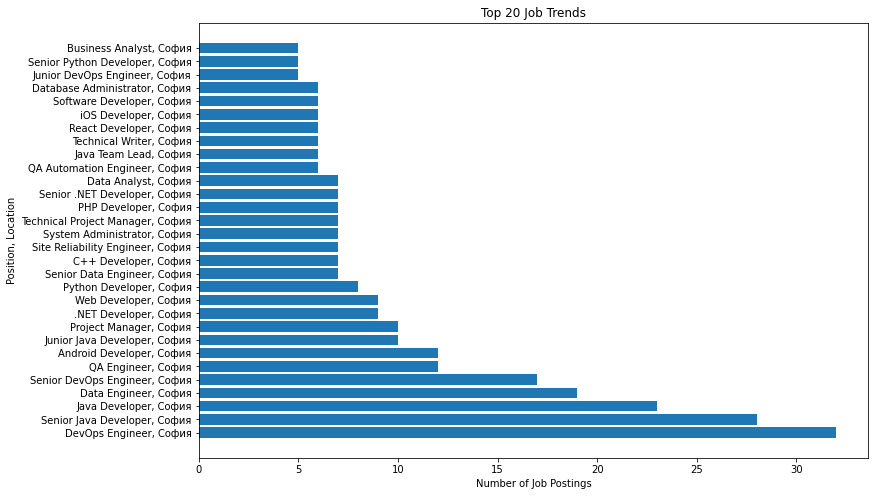

In [53]:
# Plot a horizontal bar chart of the top 20 job trends
plt.figure(figsize=(12, 8))
plt.barh(job_trends.head(30)['position'] + ', ' + job_trends.head(30)['location'], job_trends.head(30)['count'])
plt.title('Top 20 Job Trends')
plt.xlabel('Number of Job Postings')
plt.ylabel('Position, Location')
plt.show()

## Company Analysis by number of employees and date of establishment

In [54]:
# Identify any rows with non-numeric values in the 'number_of_employees' column
non_numeric_rows = df[pd.isna(df['number_of_employees'])]
non_numeric_rows_it = df[pd.isna(df['number_IT_employees'])]

In [55]:
# Group the job postings by company and calculate the average number of employees, average number of IT employees, and minimum establishment year for each company
company_analysis = df.groupby('company_name').agg({'number_of_employees': 'mean', 'number_IT_employees': 'mean', 'established': 'min'})
# Sort the companies by number of IT employees in descending order
company_analysis = company_analysis.sort_values('number_of_employees', ascending=False)
company_analysis.head(30)

,number_of_employees,number_IT_employees,established
company_name,,,
BIC Services Sofia EOOD,13000.0,0.0,1950-01-01
DXC Technology / DXC Bulgaria EOOD,4000.0,3700.0,2017-01-01
А1 България ЕАД,3600.0,300.0,1994-01-01
UniCredit Bulbank AD,3400.0,260.0,1994-01-01
Пощенска банка,3000.0,130.0,1991-01-01
МАКСИМА БЪЛГАРИЯ ЕООД,2300.0,0.0,2005-01-01
CONCENTRIX SERVICES BULGARIA LTD,2200.0,0.0,2007-01-01
ДЖИ АЙ ГРУП ЕООД,2050.0,0.0,2010-01-01
YETTEL BULGARIA EAD,1800.0,0.0,2001-01-01


## Analyze job requirements and skills

Top 20 skills in 'skills_list':
         skill  count
94   Английски    610
37        Java    296
24       Excel    115
14       C/C++    114
89     Windows    114
70         SQL    107
38  JavaScript    105
45       Linux    102
63      Python     94
0         .NET     93
68         SAP     89
57         PHP     79
3          AWS     74
66       React     68
12       Azure     54
71  SalesForce     51
40        Jira     50
32    HTML/CSS     47
13          C#     42
7      Angular     35

Top 20 skills in 'skills_no_img':
                 skill  count
37       Shell Scripts    172
16                 ERP     81
17                 ETL     70
31                 SEO     61
14  Data Visualization     55
30             Routing     54
11                 CRM     50
21                ITIL     47
36        Scrum Master     45
23               JUnit     42
3                   BI     39
18        Firewall/WAF     32
41           Switching     29
1               ASPICE     26
26              PL/SQ

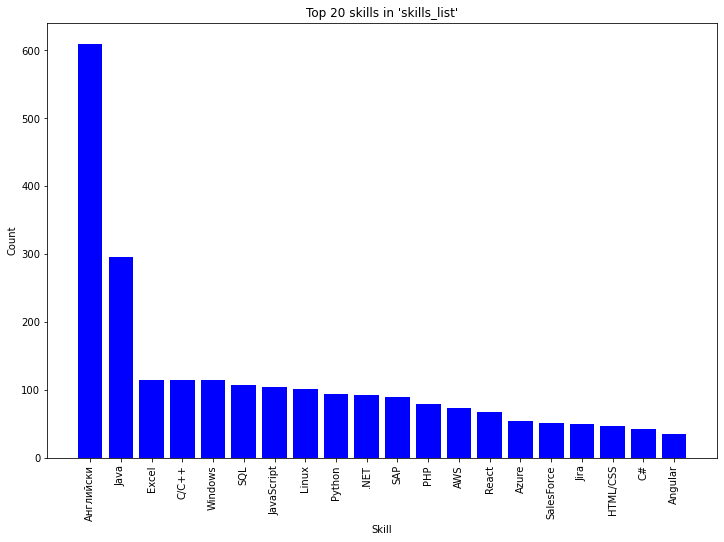

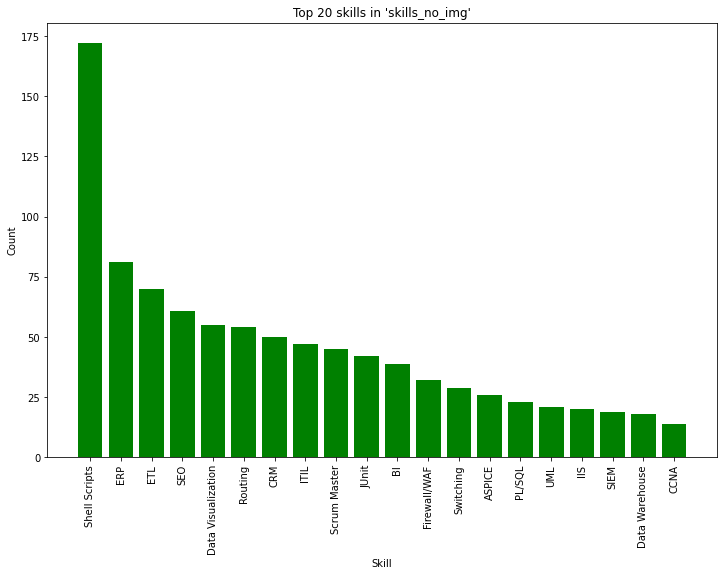

In [56]:
# Split the 'skills_list' column into a list of skills
skills_list_df = df['skills_list'].apply(lambda x: [i.strip() for i in x.strip("[]").split(",")]).apply(pd.Series).stack().reset_index(level=0).rename(columns={0: 'skill'})

# Remove the empty strings from the skills_list_df DataFrame
skills_list_df = skills_list_df[skills_list_df['skill'] != ""]

# Split the 'skills_no_img' column into a list of skills
skills_no_img_df = df['skills_no_img'].str.split(',', expand=True).stack().reset_index(level=0).rename(columns={0: 'skill'})

# Remove the empty strings from the skills_no_img_df DataFrame
skills_no_img_df = skills_no_img_df[skills_no_img_df['skill'].str.strip() != ""]

# Combine the 'skills_list' and 'skills_no_img' DataFrames into a single DataFrame
skills_df = pd.concat([skills_list_df, skills_no_img_df], ignore_index=True)
skills_df['skill'] = skills_df['skill'].str.strip()

# Group the skills by skill name and count the number of times each skill appears
skills_analysis_list = skills_list_df.groupby('skill').size().reset_index(name='count')
skills_analysis_no_img = skills_no_img_df.groupby('skill').size().reset_index(name='count')

# Sort the skills by count in descending order
skills_analysis_list = skills_analysis_list.sort_values('count', ascending=False)
skills_analysis_no_img = skills_analysis_no_img.sort_values('count', ascending=False)

print("Top 20 skills in 'skills_list':")
print(skills_analysis_list.head(20))
print("\nTop 20 skills in 'skills_no_img':")
print(skills_analysis_no_img.head(20))

# Plot a bar chart for the top 20 skills in 'skills_list'
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(skills_analysis_list['skill'].head(20), skills_analysis_list['count'].head(20), color='blue')
ax.set_xlabel('Skill')
ax.set_ylabel('Count')
ax.set_title('Top 20 skills in \'skills_list\'')
plt.xticks(rotation=90)
plt.show()

# Plot a bar chart for the top 20 skills in 'skills_no_img'
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(skills_analysis_no_img['skill'].head(20), skills_analysis_no_img['count'].head(20), color='green')
ax.set_xlabel('Skill')
ax.set_ylabel('Count')
ax.set_title('Top 20 skills in \'skills_no_img\'')
plt.xticks(rotation=90)
plt.show()


In [57]:
# Number of empty rows in column "skills_list"
empty_skills_count = df['skills_list'].apply(lambda x: x == "[]").sum()
print(f"Number of empty skills: {empty_skills_count}")

Number of empty skills: 0


In [58]:
# Number of empty rows in column "skills_no_img"
empty_skills_no_img_count = df['skills_no_img'].apply(lambda x: x == "").sum()
print(f"Number of empty skills_no_img: {empty_skills_no_img_count}")

Number of empty skills_no_img: 2401


## Work From Home Analysis

In [59]:
# Number of job postings that offer work-from-home options
work_from_home_counts = df['work_from_home'].value_counts()

# Percentage of job postings that offer work-from-home options
work_from_home_percent = work_from_home_counts / len(df) * 100

print(f"Number of job postings that offer work from home option:\n{work_from_home_counts}\n")
print(f"Percentage of job postings that offer work from home option:\n{work_from_home_percent}")

Number of job postings that offer work from home option:
Home Office Possible    1702
No Answer               1496
Online Interview         251
Name: work_from_home, dtype: int64

Percentage of job postings that offer work from home option:
Home Office Possible    49.347637
No Answer               43.374891
Online Interview         7.277472
Name: work_from_home, dtype: float64


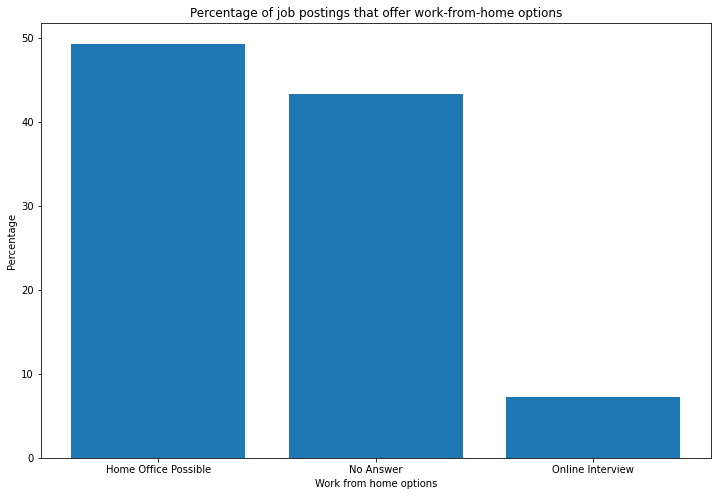

In [60]:
# Visualize the percentage of job postings that offer work-from-home options
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(work_from_home_percent.index, work_from_home_percent.values)
ax.set_title('Percentage of job postings that offer work-from-home options')
ax.set_xlabel('Work from home options')
ax.set_ylabel('Percentage')
plt.show()

## Number of jobs postings by location

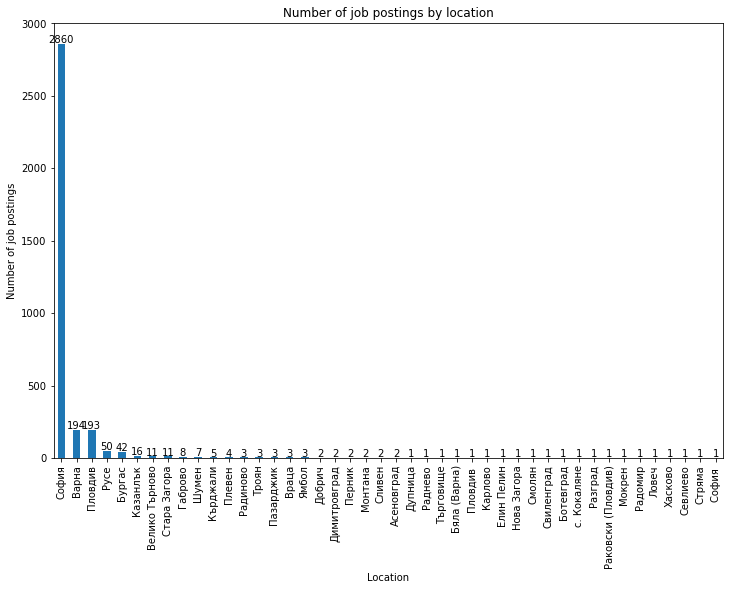

In [61]:
# Count the number of job postings by location
location_counts = df['location'].value_counts()

plt.figure(figsize=(12, 8))

# Create a bar chart of the location counts
ax = location_counts.plot(kind='bar')
plt.title('Number of job postings by location')
plt.xlabel('Location')
plt.ylabel('Number of job postings')

# Add numbers on top of each bar
for i, v in enumerate(location_counts):
    ax.text(i, v+5, str(v), ha='center')

plt.show()

## Number of IT Employees vs number of non IT employees

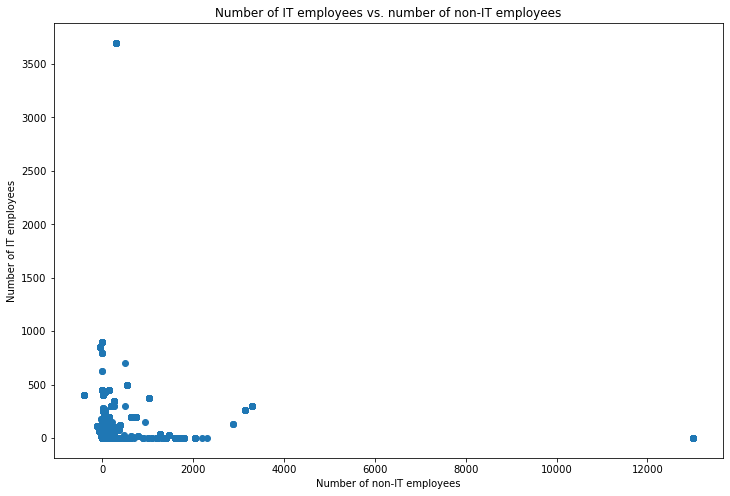

In [62]:
# Create a scatter plot of the number of IT employees vs. the number of non-IT employees
plt.figure(figsize = (12, 8))
df['number_non_IT_employees'] = df['number_of_employees'] - df['number_IT_employees']
plt.scatter(df['number_non_IT_employees'], df['number_IT_employees'])
plt.title('Number of IT employees vs. number of non-IT employees')
plt.xlabel('Number of non-IT employees')
plt.ylabel('Number of IT employees')
plt.show()


### This is relative of course but this result mainly shows that most of the companies are small with not a lot of IT employee

## Distribution of days since job postings were posted 

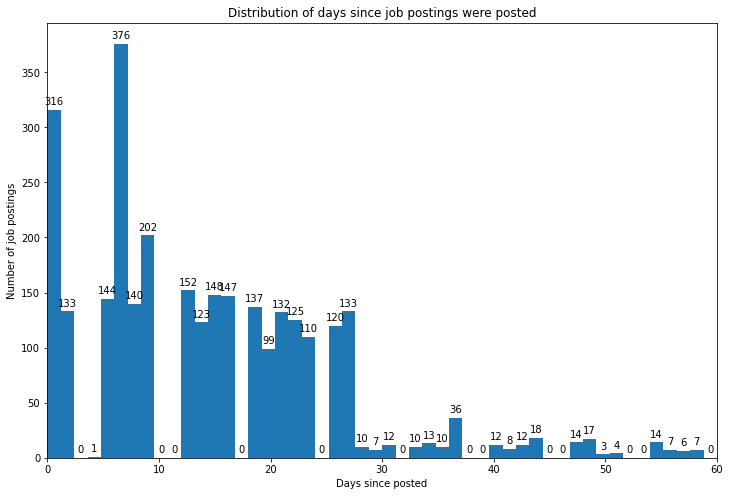

In [63]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Specify the number of bins and the range of x-axis
num_bins = 50  # Adjust this value as needed for more or less granularity
x_min = 0
x_max = 60  # Adjust this value to set the maximum days displayed

# Plot the histogram and get the outputs (n, bins, patches)
n, bins, patches = plt.hist(df['days_since_posted'], bins=num_bins, range=(x_min, x_max))

# Set the title and labels
plt.title('Distribution of days since job postings were posted')
plt.xlabel('Days since posted')
plt.ylabel('Number of job postings')

# Customize the x-axis range
plt.xlim(x_min, x_max)

# Annotate the count on top of each bin
for i in range(len(patches)):
    bin_height = patches[i].get_height()
    plt.annotate(f'{int(bin_height)}', xy=(patches[i].get_x() + patches[i].get_width() / 2, bin_height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Display the plot
plt.show()

### Distribution of companies and year when they were established

In [64]:
df['established'].mean()

Timestamp('1994-07-17 01:51:28.547405184')

/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_74924/3735501345.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['company_age'] = current_year - df_filtered['established_year']


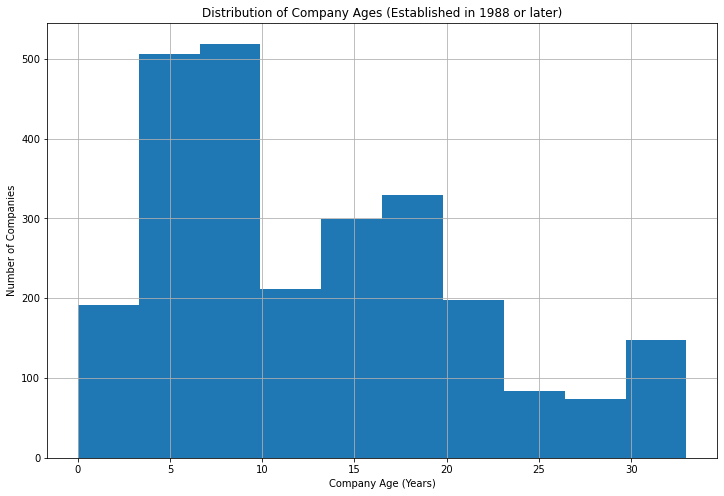

In [65]:
current_year = pd.Timestamp.now().year
df['established_year'] = df['established'].dt.year

# Filter the DataFrame to include only companies established in 1988 or later
df_filtered = df[df['established_year'] >= 1988]

df_filtered['company_age'] = current_year - df_filtered['established_year']

plt.figure(figsize=(12, 8))
df_filtered['company_age'].hist()
plt.title('Distribution of Company Ages (Established in 1988 or later)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Companies')
plt.show()

### Company Size Distribution:

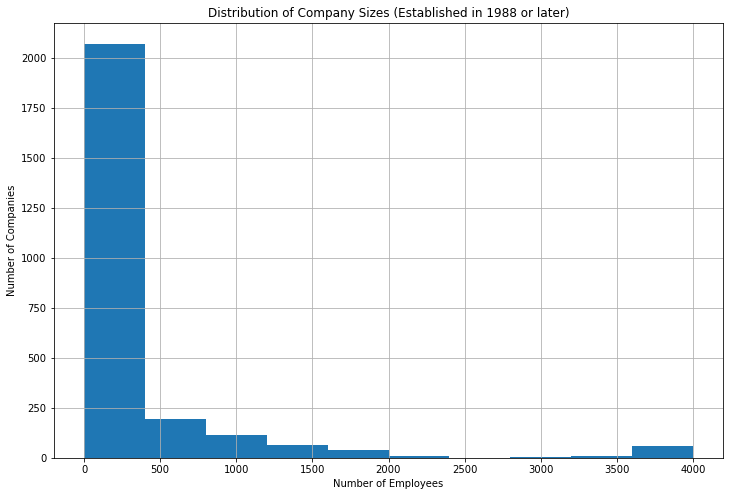

In [66]:
plt.figure(figsize=(12, 8))
df_filtered['number_of_employees'].hist()
plt.title('Distribution of Company Sizes (Established in 1988 or later)')
plt.xlabel('Number of Employees')
plt.ylabel('Number of Companies')
plt.show()


### Company Age vs. Company Size: Create a scatter plot to explore the relationship between company age and company size for companies established in 1988 or later.

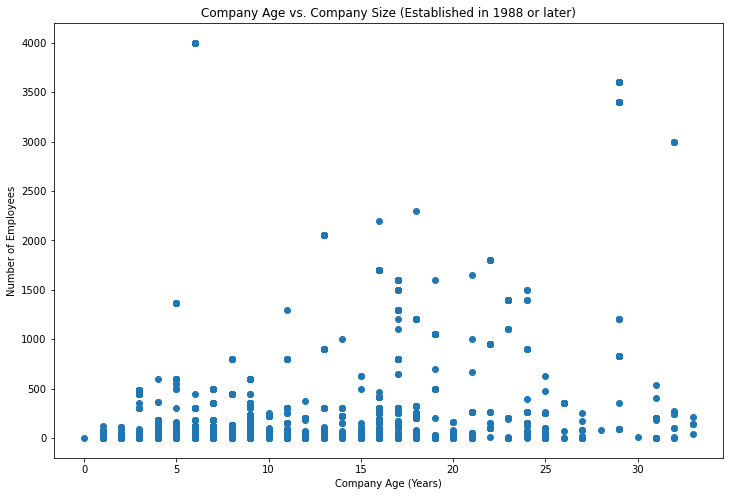

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['company_age'], df_filtered['number_of_employees'])
plt.title('Company Age vs. Company Size (Established in 1988 or later)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Employees')
plt.show()

# Usually the older the company, the more employees it has

### Grouping by Age: Group companies established in 1988 or later into age categories (startups, young and mature) 

In [68]:
def age_group(age):
    if age <= 3:
        return 'Startup'
    elif age <= 10:
        return 'Young'
    else:
        return 'Mature'

df_filtered['age_group'] = df_filtered['company_age'].apply(age_group)

grouped_sizes = df_filtered.groupby('age_group')['number_of_employees'].agg(['count', 'mean', 'median', 'min', 'max'])
print(grouped_sizes)


           count        mean  median  min     max
age_group                                        
Mature      1302  428.112135   150.0  0.0  3600.0
Startup      191  116.157068    20.0  0.0   490.0
Young       1066  201.704503    70.0  0.0  4000.0


/var/folders/y3/n8lqxtc5083d11375v3_wb740000gn/T/ipykernel_74924/898971437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = df_filtered['company_age'].apply(age_group)


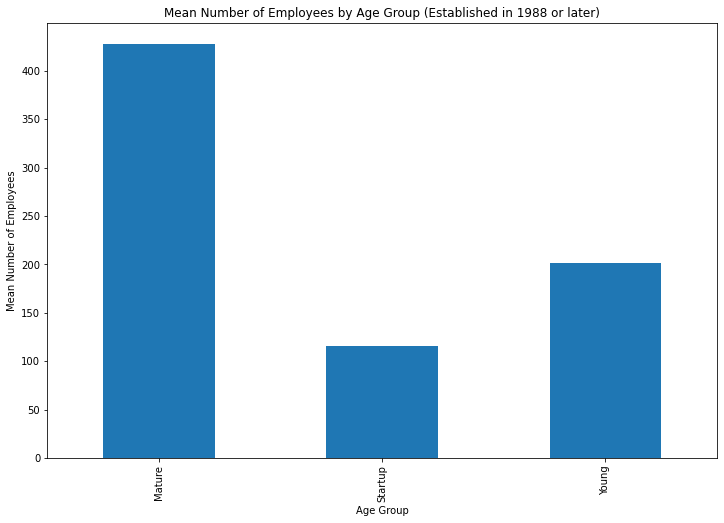

In [69]:
mean_sizes = df_filtered.groupby('age_group')['number_of_employees'].mean()

plt.figure(figsize=(12, 8))
mean_sizes.plot(kind='bar')
plt.title('Mean Number of Employees by Age Group (Established in 1988 or later)')
plt.xlabel('Age Group')
plt.ylabel('Mean Number of Employees')
plt.show()

# We can conclude that mature companies typically have more employees

In [70]:
# Calculates the mean salary of all job postings that have listed salary for the position
mean_salary = df[df['mean_salary'] > 1]['mean_salary'].mean()
print("Mean salary:", mean_salary)

Mean salary: 4716.890862944162


### Calculate the average salary per position

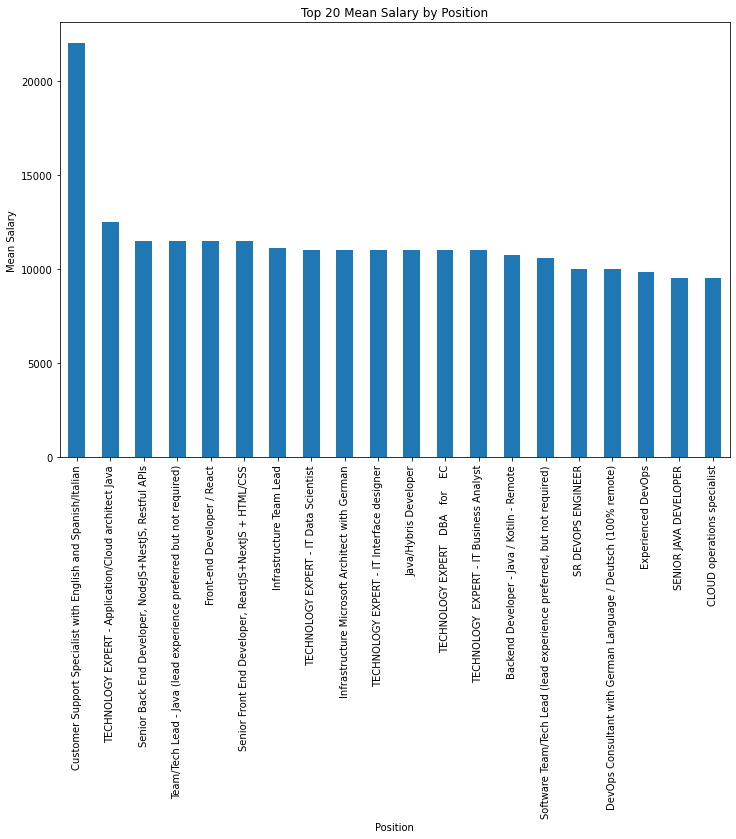

In [71]:
mean_salaries_by_position = df.groupby('position')['mean_salary'].mean().sort_values(ascending=False)

top_positions = mean_salaries_by_position.head(20)

plt.figure(figsize=(12, 8))
top_positions.plot(kind='bar')
plt.title('Top 20 Mean Salary by Position')
plt.xlabel('Position')
plt.ylabel('Mean Salary')
plt.xticks(rotation=90)
plt.show()

###  Top 20 companies offering the highest average salary.

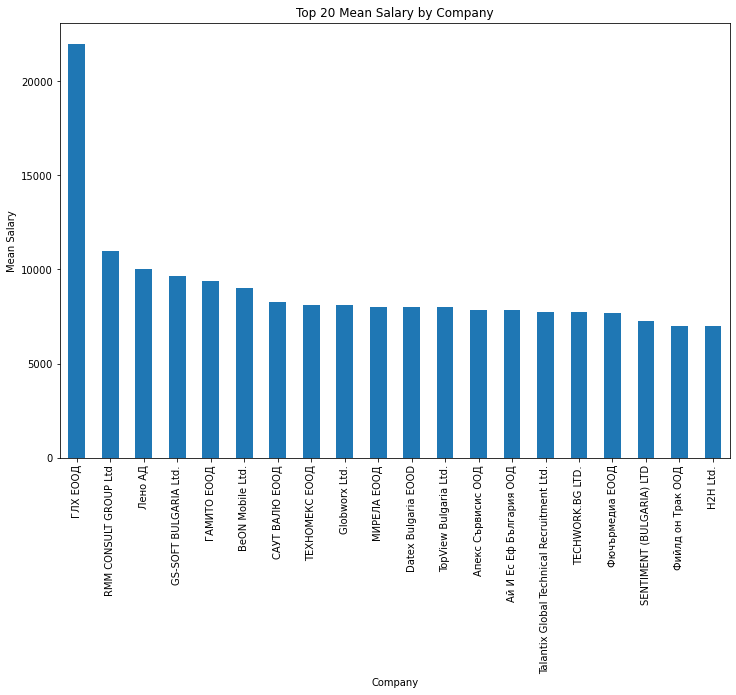

In [72]:
df.groupby('company_name')['mean_salary'].mean().sort_values(ascending=False).head(10)

top_salaries_by_company = df.groupby('company_name')['mean_salary'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_salaries_by_company.plot(kind='bar')
plt.title('Top 20 Mean Salary by Company')
plt.xlabel('Company')
plt.ylabel('Mean Salary')
plt.xticks(rotation=90)
plt.show()

### Calculates the mean salary (max) by company age

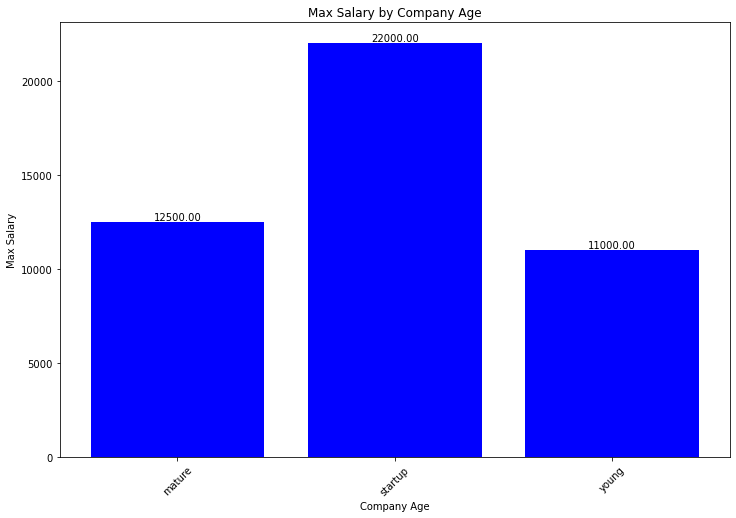

In [81]:
# Categorize the companies into startup, young, and mature based on their age
df['company_age'] = df['established_year'].apply(lambda x: 'startup' if x >= (date.today().year - 3) else ('young' if x >= (date.today().year - 5) else 'mature'))

# Calculate the maximum salary by company age
max_salary_by_age = df.groupby('company_age')['mean_salary'].max()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(max_salary_by_age.index, max_salary_by_age.values, color='blue')

ax.set_xlabel('Company Age')
ax.set_ylabel('Max Salary')
ax.set_title('Max Salary by Company Age')
plt.xticks(rotation=45)

# Adding a number on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}', ha='center', va='bottom')

plt.show()

# So it seems that highest salaries can be found in startups and salaries are almost equal
# between mature companies and young ones.